In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats



In [2]:
df = pd.read_csv("Surat.csv")
pd.set_option("display.max_columns", None)
df

,YEAR,MO,DY,HR,T2M,PRECTOTCORR,RH2M,WD10M,WS10M
0,2011,3,1,5,21.44,0.0,33.69,31.49,1.47
1,2011,3,1,6,21.57,0.0,32.88,42.73,1.12
2,2011,3,1,7,23.93,0.0,28.56,47.55,0.87
3,2011,3,1,8,27.66,0.0,24.19,5.91,1.14
4,2011,3,1,9,32.65,0.0,19.12,355.84,1.72
...,...,...,...,...,...,...,...,...,...
86995,2021,2,1,0,18.23,0.0,24.94,105.06,3.73
86996,2021,2,1,1,17.83,0.0,25.12,112.94,3.93
86997,2021,2,1,2,17.40,0.0,25.06,115.02,4.03
86998,2021,2,1,3,16.98,0.0,25.44,113.95,4.06


In [3]:
numerical_feature = [
    feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature = [feature for feature in numerical_feature if len(
    df[feature].unique()) < 32]
continuous_feature = [
    feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [
    feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))


Numerical Features Count 9
Discrete feature Count 4
Continuous feature Count 5
Categorical feature Count 0


In [4]:
# Handle Missing Values
df.isnull().sum()*100/len(df)



YEAR           0.0
MO             0.0
DY             0.0
HR             0.0
T2M            0.0
PRECTOTCORR    0.0
RH2M           0.0
WD10M          0.0
WS10M          0.0
dtype: float64

In [5]:
print(numerical_feature)


['YEAR', 'MO', 'DY', 'HR', 'T2M', 'PRECTOTCORR', 'RH2M', 'WD10M', 'WS10M']


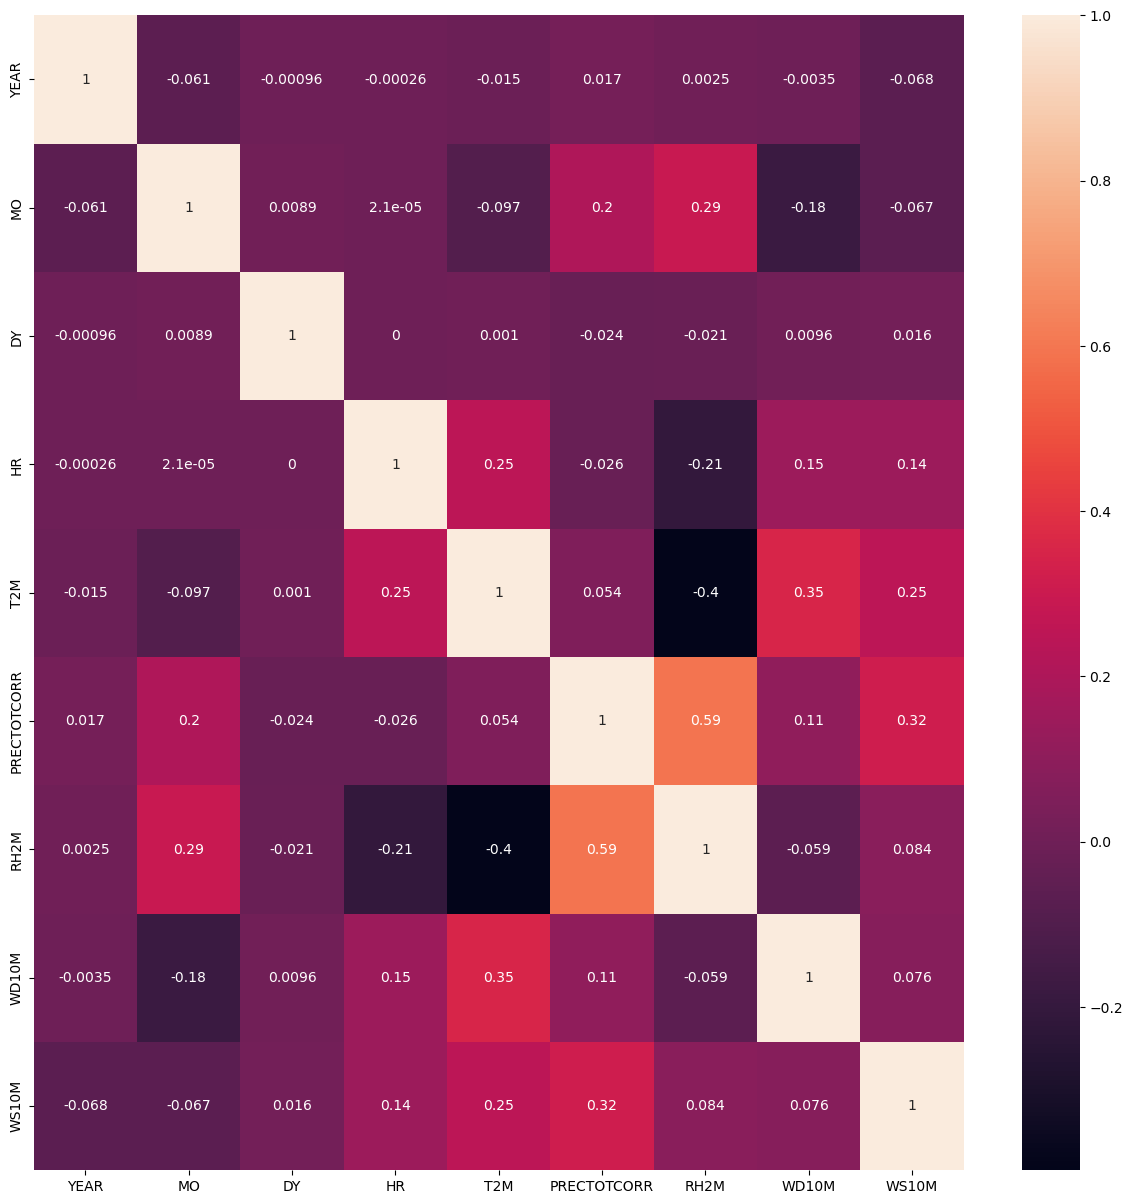

In [6]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [7]:
data=df.copy()

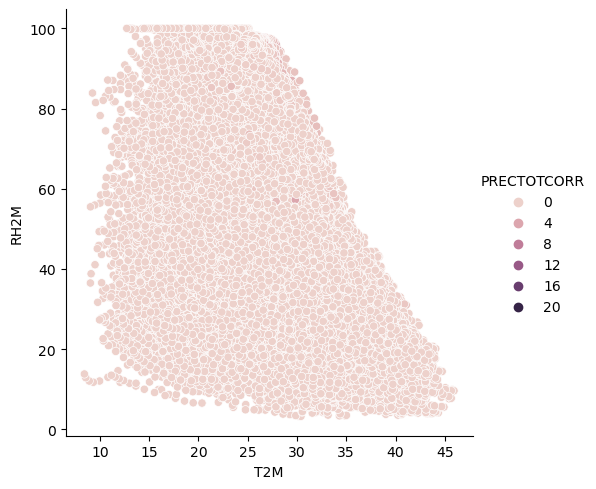

In [8]:
sns.relplot(x='T2M', y='RH2M', hue='PRECTOTCORR', data=data)
#QV :Humedity


In [9]:
sns.relplot(x='T2M',y='WS50M',hue='PRECTOTCORR',data=data)

ValueError: Could not interpret value `WS50M` for parameter `y`

In [ ]:
for feature in continuous_feature:
    data = df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15, 15))
    plt.show()


In [ ]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [ ]:
d=df.copy()

In [ ]:
print(d["T2M"].unique())
print(type(df["T2M"].unique()))
print(d["PRECTOTCORR"].unique())
print(type(df["PRECTOTCORR"].unique()))
# print(d["WS50M_RANGE"].unique())
print(type(d["WS50M"].unique()))


In [ ]:
corrmat = d.corr()
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [ ]:
def qq_plots(d, variable):
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()


In [ ]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()


In [ ]:
d.PRECTOTCORR.unique()


In [ ]:
d1=d.copy()

In [ ]:

d1=d1.PRECTOTCORR.map({0:1})

In [ ]:
d2=d1.replace(np.nan, 0)

In [ ]:
d2.unique()


In [ ]:
d3=d['T2M']

In [ ]:
d4 = pd.concat([d3, d2], axis=1, join='inner')
display(d4)


In [ ]:
d5=d['HR'].copy()

In [ ]:
d6 = pd.concat([d4, d5], axis=1, join='inner')
display(d6)


In [ ]:
d7=d['DY']

In [ ]:
d8=d['MO']

In [ ]:
d9=d['YEAR']

In [ ]:
d10 = pd.concat([d6, d7], axis=1, join='inner')
display(d10)


In [ ]:
d11 = pd.concat([d10, d8], axis=1, join='inner')
display(d11)


In [ ]:
d12 = pd.concat([d11, d9], axis=1, join='inner')
display(d12)


In [ ]:
d12

In [ ]:
d12['PRECTOTCORR'].unique()

In [ ]:
d13=d['RH2M'].copy()

In [ ]:
d14=d['WS50M'].copy()

In [ ]:
d15 = pd.concat([d12, d13], axis=1, join='inner')
display(d15)

In [ ]:
d16 = pd.concat([d15, d14], axis=1, join='inner')
display(d16)

In [ ]:
d17=d['WS50M'].copy()

In [ ]:
d18 = pd.concat([d16, d17], axis=1, join='inner')
display(d18)

In [ ]:
sns.countplot(d18["PRECTOTCORR"])

In [ ]:
d18.to_csv("Surat-1.csv")

In [ ]:
d18